In [332]:
# 1.	Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python. 
# 2.	Загрузите датасет в pandas DataFrame под названием df. 
# 3.	Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы). 
# 4.	Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете. 
# 5.	Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик. 
# 6.	Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [333]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


In [334]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [336]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [337]:
df.drop_duplicates(inplace=True)

In [338]:
df['MasVnrArea']=df['MasVnrArea'].astype(float)


In [339]:
from pandas.api.types import is_numeric_dtype
columns_with_null=df.columns[df.isnull().any()].tolist()
columns_null=[]
for column in columns_with_null:
    value=df[column].isnull().sum()
    columns_null.append([column, df[column].isnull().sum(), is_numeric_dtype(df[column])])
columns_null

[['LotFrontage', 259, True],
 ['Alley', 1369, False],
 ['MasVnrType', 872, False],
 ['MasVnrArea', 8, True],
 ['BsmtQual', 37, False],
 ['BsmtCond', 37, False],
 ['BsmtExposure', 38, False],
 ['BsmtFinType1', 37, False],
 ['BsmtFinType2', 38, False],
 ['Electrical', 1, False],
 ['FireplaceQu', 690, False],
 ['GarageType', 81, False],
 ['GarageYrBlt', 81, True],
 ['GarageFinish', 81, False],
 ['GarageQual', 81, False],
 ['GarageCond', 81, False],
 ['PoolQC', 1453, False],
 ['Fence', 1179, False],
 ['MiscFeature', 1406, False]]

In [340]:
rows_len=len(df)
for column in columns_null:
    print(column)
    if column[2]:
        df[column[0]]=df[column[0]].interpolate(method='polynomial', order=3)
    else:
        if column[1]>rows_len*0.95:
            df.drop(columns=[column[0]], inplace=True)
        elif column[1]<=rows_len*0.95:
             df[column[0]]=df[column[0]].fillna(df[column[0]].mode()[0])
             
            

['LotFrontage', 259, True]
['Alley', 1369, False]
['MasVnrType', 872, False]
['MasVnrArea', 8, True]
['BsmtQual', 37, False]
['BsmtCond', 37, False]
['BsmtExposure', 38, False]
['BsmtFinType1', 37, False]
['BsmtFinType2', 38, False]
['Electrical', 1, False]
['FireplaceQu', 690, False]
['GarageType', 81, False]
['GarageYrBlt', 81, True]
['GarageFinish', 81, False]
['GarageQual', 81, False]
['GarageCond', 81, False]
['PoolQC', 1453, False]
['Fence', 1179, False]
['MiscFeature', 1406, False]


In [341]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [343]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

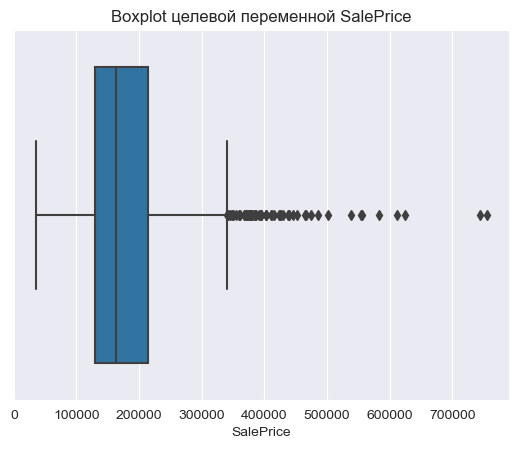

In [344]:
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot целевой переменной SalePrice')
plt.show()

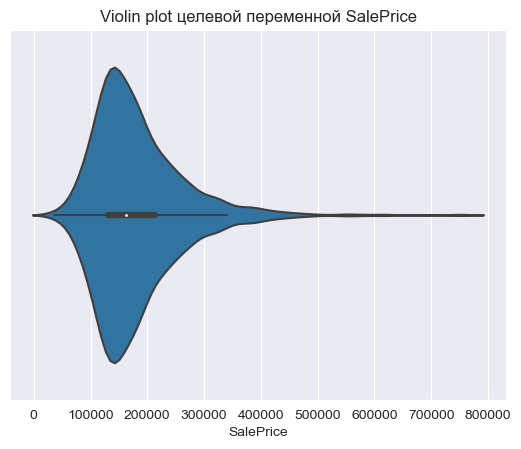

In [345]:
sns.violinplot(x=df['SalePrice'])
plt.title('Violin plot целевой переменной SalePrice')
plt.show()

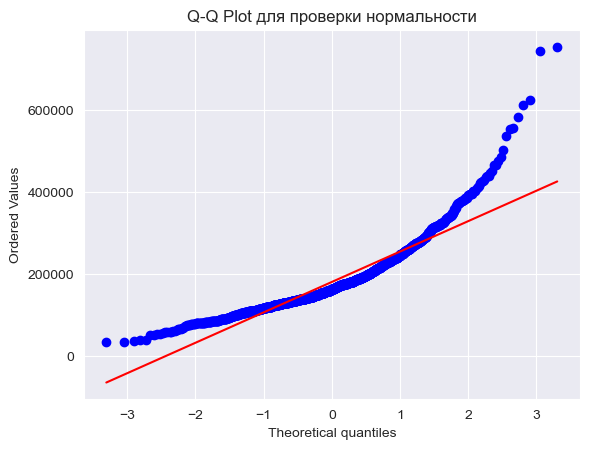

In [346]:
#Проверка на нормальность
import scipy.stats as stats

stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности')
plt.show()

In [347]:
# Статистические тест Шапиро-Уилка:
from scipy.stats import shapiro

stat, p = shapiro(df['SalePrice'])
print('Статистика:', stat)
print('p-значение:', p)

if p > 0.05:
    print("Распределение SalePrice похоже на нормальное.")
else:
    print("Распределение SalePrice не нормальное.")

Статистика: 0.8696714665902145
p-значение: 3.2061412312021656e-33
Распределение SalePrice не нормальное.


In [348]:
#Выявление выбросов
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
iqr = q3 - q1  # Межквартильный размах

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print("Количество выбросов SalePrice", len(outliers))

Количество выбросов SalePrice 61


In [349]:
# ANOVA или F-критерий для выявления корреляций категориальных характеристик с целевой переменной
from sklearn.feature_selection import f_classif
non_numeric_columns = df.select_dtypes(include=['object'])
# Вычисление значимости категориальных характеристик
caracteristics_important=[]
for col in non_numeric_columns.columns:
    f_scores, p_values = f_classif(pd.get_dummies(df[col]), df['SalePrice'])
    if p_values.mean() < 0.05:
        caracteristics_important.append(col)

print(f'Характеристики  {caracteristics_important} статистически значимы для целевой переменной  SalePrice')
# correlated_features = correlations[correlations.abs() > 0.5].index
# print("Сильно коррелирующие признаки:", correlated_features.tolist())

D:\DataSience\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
D:\DataSience\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
D:\DataSience\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
D:\DataSience\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
D:\DataSience\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Характеристики  ['Street', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'GarageFinish'] статистически значимы для целевой переменной  SalePrice


D:\DataSience\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [350]:
numeric_columns_data_set = df.select_dtypes(exclude=['object'])
numeric_columns_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

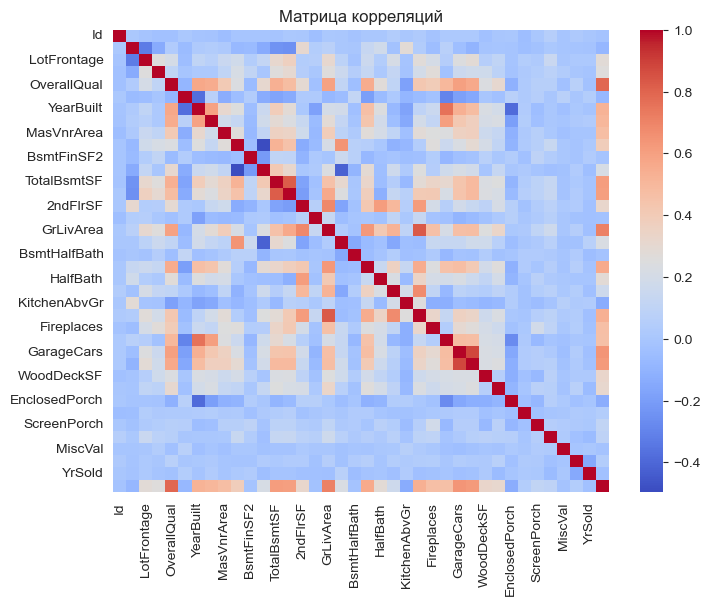

In [351]:
correlation_matrix = numeric_columns_data_set.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [352]:
print('Числовые характеристики оказывающие наибольшее влияние на целевую переменную SalePrice')
out=correlation_matrix[abs(correlation_matrix['SalePrice'])>0.4]['SalePrice']
out

Числовые характеристики оказывающие наибольшее влияние на целевую переменную SalePrice


OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.474186
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.458607
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [353]:
correlation_matrix 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.015268,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050969,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.329479,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023053,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.015268,-0.329479,1.000000,0.255973,0.202486,-0.050471,0.102046,0.067981,0.146524,0.179385,...,0.058790,0.105296,-0.011100,0.046271,0.028667,0.144990,-0.000367,0.017474,0.013630,0.278858
LotArea,-0.033226,-0.139781,0.255973,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103573,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.202486,0.105806,1.000000,-0.091932,0.572323,0.550684,0.408647,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.050471,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127913,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.102046,0.014228,0.572323,-0.375983,1.000000,0.592855,0.313592,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.067981,0.013788,0.550684,0.073741,0.592855,1.000000,0.178157,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050969,0.023053,0.146524,0.103573,0.408647,-0.127913,0.313592,0.178157,1.000000,0.264124,...,0.161222,0.125513,-0.109774,0.018805,0.061445,0.011728,-0.029726,-0.008800,-0.006122,0.474186
BsmtFinSF1,-0.005024,-0.069836,0.179385,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264124,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [354]:
summary_status=df[['OverallQual', 'GrLivArea', 'GarageCars']]
summary_status.describe()

,OverallQual,GrLivArea,GarageCars
count,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123
std,1.382997,525.480383,0.747315
min,1.000000,334.000000,0.000000
25%,5.000000,1129.500000,1.000000
50%,6.000000,1464.000000,2.000000
75%,7.000000,1776.750000,2.000000
max,10.000000,5642.000000,4.000000


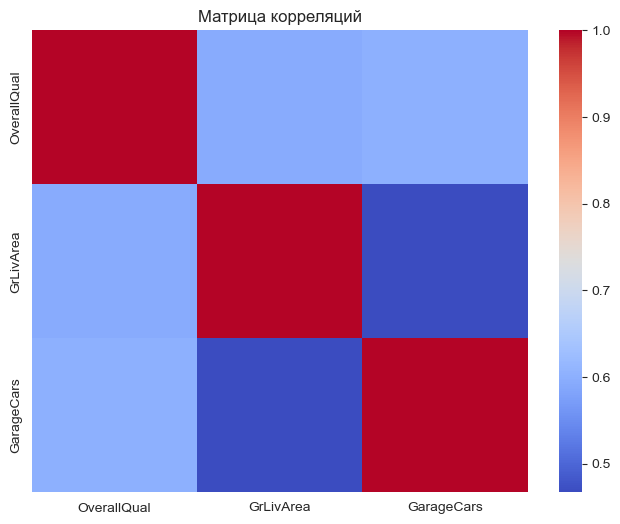

In [355]:


correlation_matrix = summary_status.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [356]:
correlation_matrix

,OverallQual,GrLivArea,GarageCars
OverallQual,1.000000,0.593007,0.600671
GrLivArea,0.593007,1.000000,0.467247
GarageCars,0.600671,0.467247,1.000000


In [357]:
current_year = datetime.now().year
df['Age_Propety']=current_year-df['YearBuilt']
df.to_csv('cleaned_house_prices.csv', index=False)

In [358]:
numeric_columns_data_set.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [359]:
z_scores = stats.zscore(df['MasVnrArea'])
threshold = 4
outliers = df['MasVnrArea'][z_scores > threshold]
df.loc[z_scores > threshold, 'MasVnrArea'] = df['MasVnrArea'].median()

In [360]:
df['LotArea'] = winsorize(df['LotArea'], limits=[0.06, 0.06])

In [361]:
scaler = StandardScaler()
df[['TotalBsmtSF']] = scaler.fit_transform(df[['TotalBsmtSF']])
df[['LotArea']] = scaler.fit_transform(df[['LotArea']])

In [362]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_Propety
0,1,60,RL,65.0,-0.366327,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,MnPrv,0,2,2008,WD,Normal,208500,21
1,2,20,RL,80.0,-0.019854,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,MnPrv,0,5,2007,WD,Normal,181500,48
2,3,60,RL,68.0,0.477259,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,MnPrv,0,9,2008,WD,Normal,223500,23
3,4,70,RL,60.0,-0.034918,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,MnPrv,0,2,2006,WD,Abnorml,140000,109
4,5,60,RL,84.0,1.384114,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,MnPrv,0,12,2008,WD,Normal,250000,24


In [363]:
df = pd.read_csv('cleaned_house_prices.csv')
le = LabelEncoder()
df['GarageYrBlt_Encoded'] = le.fit_transform(df['GarageYrBlt'])

df = pd.get_dummies(df, columns=['HouseStyle'], prefix='HouseStyle', drop_first=True)

pivot_table = df.pivot_table(index='SaleCondition', columns='Age_Propety', values='LotArea', aggfunc='mean')
pivot_table

Age_Propety,14,15,16,17,18,19,20,21,22,23,...,124,126,131,132,134,139,142,144,149,152
SaleCondition,,,,,,,,,,,,,,,,,,,,,
Abnorml,NaN,NaN,NaN,3604.000000,13015.500000,9082.000000,NaN,12822.000000,NaN,NaN,...,9663.5,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000,NaN,NaN
AdjLand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,NaN,NaN,NaN,NaN,4750.000000,NaN,14572.000000,12394.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal,NaN,9820.666667,11459.444444,9539.947368,10028.291667,8338.589744,8322.576923,9521.348837,10723.26087,10407.5,...,9326.5,8100.0,13500.0,14775.0,9810.0,11070.0,17671.0,13328.666667,6342.0,5250.0
Partial,11394.0,8670.600000,15767.857143,11292.965517,10637.575000,11047.272727,13072.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
